**Chapter 1 – The Machine Learning landscape**

This notebook contains the code examples in chapter 1. You'll also find the exercise solutions at the end of the notebook. The rest of this notebook is used to generate lifesat.csv from the original data sources, and some of this chapter's figures.

You're welcome to go through the code in this notebook if you want, but the real action starts in the next chapter.

In [2]:
import sys 
assert sys.version_info >= (3, 7)

In [3]:
from packaging import version 
import sklearn 

assert version.parse(sklearn.__version__) >= version.parse("1.01")

In [7]:
import matplotlib.pyplot as plt 

plt.rc('font', size = 12)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 12)
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

In [5]:
import numpy as np

np.random.seed(42)

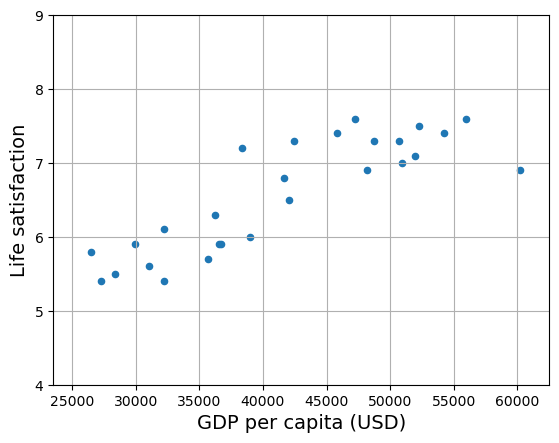

[[6.30165767]]


In [21]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import sklearn.linear_model

data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

x = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

lifesat.plot(kind = "scatter", grid = True, x = "GDP per capita (USD)", y = "Life satisfaction")
plt.axis([23_500,62_500, 4, 9])
plt.show()

model = LinearRegression()
model.fit(x, y)
X_new = [[37_655.2]]
print(model.predict(X_new))


In [18]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors = 3)
model.fit(x, y)
print(model.predict(X_new))

[[6.33333333]]


In [24]:
import urllib.request
from pathlib import Path

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)

data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [25]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [30]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"


gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()


,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [31]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index = "Country", columns = "Indicator", values = "Value")
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [33]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [34]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [35]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

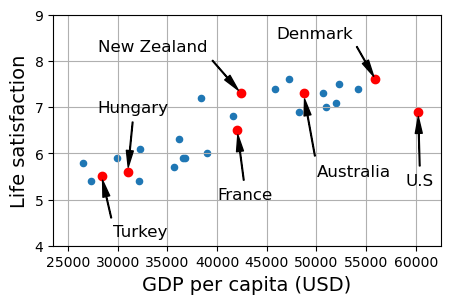

In [38]:
country_stats.plot(kind = 'scatter', figsize = (5, 3), grid = True, x = gdppc_col, y = lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = { 
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}
for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S" if country == "United States" else country
    plt.annotate(country, xy = (pos_data_x, pos_data_y),
                 xytext = pos_text, fontsize = 12,
                 arrowprops = dict(facecolor = 'black', width = 0.5,
                                   shrink = 0.08, headwidth = 5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [39]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) | (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [40]:
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

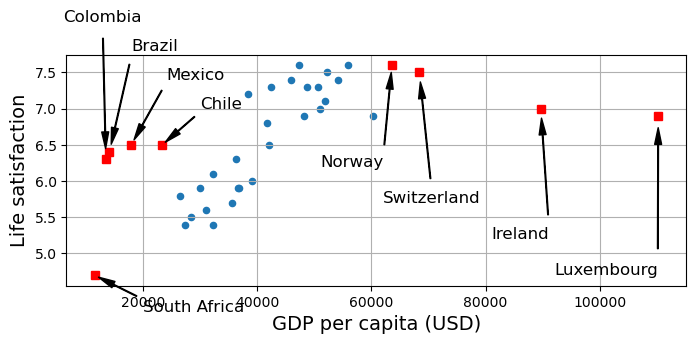

In [43]:
full_country_stats.plot(kind = 'scatter', figsize = (8, 3), x = gdppc_col, y = lifesat_col, grid = True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy = (pos_data_x, pos_data_y),
                 xytext = pos_text, fontsize = 12,
                 arrowprops = dict(facecolor = 'black', width = 0.5, shrink = 0.08, headwidth = 5))
    plt.plot(pos_data_x, pos_data_y, "rs")
    

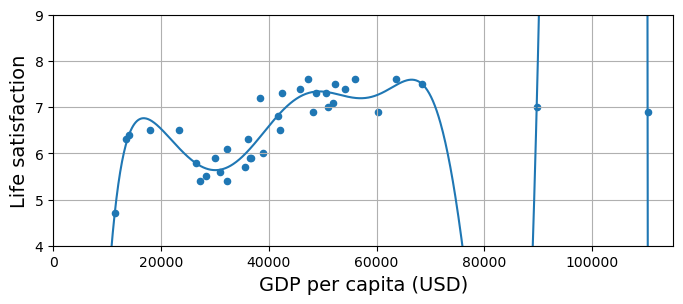

In [56]:
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import pipeline

gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)


poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()


pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)
])


pipeline_reg.fit(Xfull, yfull)
X = np.linspace(0, 115_000, 1000)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, 4, 9])

plt.show()
